# LSTM Model for Text Classification
Train Bidirecational LSTM model to classify financial headline news  
Data from 'data_processor_catergorical.py', healine news as features and stock's performance as labels

Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


Load data, csv from 'data_processor_catergorical.py'

In [2]:
df = pd.read_csv('cleaned_FB_catergorical.csv')

headlines = df.Headlines.values
labels = df.Labels.values


Model requirements

In [3]:
vocab_size = 1000 #Vocabulary size
embedding_dim = 16 #Number of dimension of word embedding
max_length = 100 #Max length of sequence, headline should not be longer then 100 words
trunc_type = 'post' #Cut off after max length
padding_type = 'post' #Pad sequence at the end to fill max length
oov_tok = "<OOV>" #replace word that are not in vocabulary with out of vocab token 
training_size = int(len(df)*0.8) #splits data 80% for testing and 20% for validation

#Split training and testing data
train_hl = headlines[:training_size]
test_hl = headlines[training_size:]
train_l = labels[:training_size]
test_l = labels[training_size:]


Tokenizing words, assigning values to most common words and out of vocab words with "< OOV >"

In [4]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_hl)

word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(train_hl)
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(test_hl)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_pad)) #Number of training sequences
print(len(train_l)) #Number of training labels
print(len(test_pad)) #Number of test sequences
print(len(test_l)) #Number of test labels


2121
2121
531
531


Build Bidirectional LSTM model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(62, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #3 categories bases off stock performance, negative, netural and positive
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#convert tokenizered words into numpy array
train_pad = np.array(train_pad)
train_l = np.array(train_l)
test_pad = np.array(test_pad)
test_l = np.array(test_l)


Train model

In [6]:
history = model.fit(train_pad, train_l, epochs=10, validation_data=(test_pad, test_l), verbose=2)

Epoch 1/10
67/67 - 3s - loss: 1.0494 - accuracy: 0.4800 - val_loss: 1.0503 - val_accuracy: 0.4859
Epoch 2/10
67/67 - 1s - loss: 1.0044 - accuracy: 0.5248 - val_loss: 1.0578 - val_accuracy: 0.4896
Epoch 3/10
67/67 - 1s - loss: 0.9500 - accuracy: 0.5587 - val_loss: 1.0708 - val_accuracy: 0.4896
Epoch 4/10
67/67 - 1s - loss: 0.8816 - accuracy: 0.5809 - val_loss: 1.1375 - val_accuracy: 0.4652
Epoch 5/10
67/67 - 1s - loss: 0.8166 - accuracy: 0.6162 - val_loss: 1.1978 - val_accuracy: 0.4181
Epoch 6/10
67/67 - 1s - loss: 0.7615 - accuracy: 0.6521 - val_loss: 1.2845 - val_accuracy: 0.4237
Epoch 7/10
67/67 - 1s - loss: 0.7181 - accuracy: 0.6615 - val_loss: 1.4038 - val_accuracy: 0.4313
Epoch 8/10
67/67 - 1s - loss: 0.6725 - accuracy: 0.6931 - val_loss: 1.4394 - val_accuracy: 0.4030
Epoch 9/10
67/67 - 1s - loss: 0.6303 - accuracy: 0.7129 - val_loss: 1.6354 - val_accuracy: 0.3917
Epoch 10/10
67/67 - 1s - loss: 0.5902 - accuracy: 0.7492 - val_loss: 1.6222 - val_accuracy: 0.3804


Visualize Training

<function matplotlib.pyplot.show(close=None, block=None)>

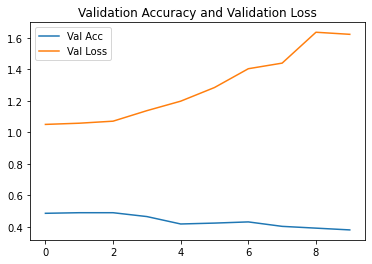

In [7]:
epoch = range(len(history.history['val_accuracy']))
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.plot(epoch, val_acc)
plt.plot(epoch, val_loss)
plt.title('Validation Accuracy and Validation Loss')
plt.legend(['Val Acc', 'Val Loss'])
plt.show

# Conclusion
Model is overfitting with accuracy increasing while valdiation accuracy decreasing below 40% 
Validation loss is also increasing, another sign of overfitting
Model is not learning but randomly classifying the headlines

## Causes
Too little data, headline news were scraped from seekingalpha.com which had limited headline news dating back 2 years  
Only 2121 training samples

Data might be too noisy, some headlines were irrelevant
* eg. "Baird finds good rebounders among FANGs", "Europe urges streamers to limit service amid network pressure", "Jefferies names potential tech winners amid outbreak" 

## To-do
* Train on a larger language model, to capture higher complexity of financial semantic
* Collect more high quality headlines news, from either routers or bloomberg